In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.duplicated().sum()

1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Cleaning

In [9]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

#### Heatmap

In [10]:
num = df.select_dtypes(include='number')
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [11]:
corel = num.corr()
corel

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


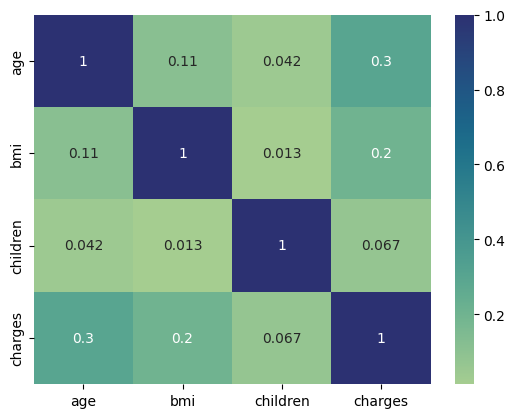

In [12]:
sns.heatmap(corel, cmap = 'crest', annot=True)
plt.show()

### Encoding categorical variables

In [13]:
df.describe(include = 'object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [19]:
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
dfm = pd.get_dummies(df['region'], drop_first = True, prefix='region').astype(int)
dfm

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [21]:
region = df[df['region'] == 'northeast']
region

,age,sex,bmi,children,smoker,region,charges
8,37,1,29.830,2,0,northeast,6406.41070
10,25,1,26.220,0,0,northeast,2721.32080
16,52,0,30.780,1,0,northeast,10797.33620
17,23,1,23.845,0,0,northeast,2395.17155
20,60,0,36.005,0,0,northeast,13228.84695
...,...,...,...,...,...,...,...
1321,62,1,26.695,0,1,northeast,28101.33305
1325,61,1,33.535,0,0,northeast,13143.33665
1326,42,0,32.870,0,0,northeast,7050.02130
1328,23,0,24.225,2,0,northeast,22395.74424


In [22]:
df.drop(['region'], axis=1, inplace = True)
df1 = pd.concat([df, dfm], axis=1)
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [23]:
# Defining the dependent and independent variables
X = df1.drop(['charges'], axis =1)
y = df1['charges']
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [26]:
print("shape of X_train:",X_train.shape)
print('*'*50)
print("shape of X_test:",X_test.shape)
print('*'*50)
print("shape ofy_train:",y_train.shape)
print('*'*50)
print("shape of y_train:",y_train.shape)
print('*'*50)


shape of X_train: (1069, 8)
**************************************************
shape of X_test: (268, 8)
**************************************************
shape ofy_train: (1069,)
**************************************************
shape of y_train: (1069,)
**************************************************


In [27]:
#scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,1.489407,0.962354,0.414116,1.585550,-0.532272,-0.556820,1.642852,-0.568348
1,1.489407,-1.039118,-1.096822,-0.920541,-0.532272,1.795911,-0.608698,-0.568348
2,0.631515,-1.039118,-0.543228,-0.085177,-0.532272,-0.556820,-0.608698,-0.568348
3,-1.441724,0.962354,0.712141,-0.920541,1.878739,-0.556820,-0.608698,1.759484
4,-1.441724,-1.039118,-0.290156,-0.920541,1.878739,1.795911,-0.608698,-0.568348


In [30]:
#modelling the data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

### Linear Regressor

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
preds = lr.predict(X_test)

In [33]:
res = mean_squared_error(y_test, preds)
res

32368228.832193177

In [34]:
r_res = r2_score(y_test, preds)
r_res

0.7497814388540696

### Decision Tree

In [35]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
pred_tree = dtree.predict(X_test)

In [37]:
res_tree = mean_squared_error(y_test, pred_tree)
res_tree

46781232.92896857

In [38]:
rr_res = r2_score(y_test, pred_tree)
rr_res

0.6383635059921193

### Random Forest

In [39]:
rfor = RandomForestRegressor()
rfor.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
pred_ran = rfor.predict(X_test)

In [41]:
rand_res = mean_squared_error(y_test, pred_ran)
rand_res

23222200.979826372

In [42]:
rr_rand = r2_score(y_test, pred_ran)
rr_rand

0.82048366792209